# FASHION CLASS CLASSIFICATION

# STEP 1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.



# STEP 2: IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep=',')

# STEP 3: VISUALIZATION OF THE DATASET

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
fashion_test_df.shape

(10000, 785)

In [22]:
# 학습 배열 생성
training = np.array(fashion_train_df, dtype = 'float32')
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
testing = np.array(fashion_test_df, dtype = 'float32')
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

2.0

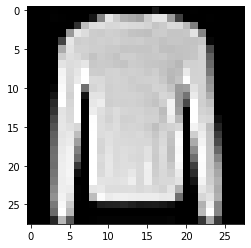

In [30]:
# select any random index from 1 tp 60,000
i = random.randint(1,60000)
# 28 * 28 픽셀의 형태로 이미지를 시각화
# 데이터를 28 * 28의 형태로 재구성
plt.imshow(training[i,1:].reshape(28,28), cmap = 'gray')
label = training[i,0]
label

# STEP 4: TRAINING THE MODEL

In [31]:
# prepare the training and testing dataset
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [34]:
y_train.shape

(60000,)

In [35]:
X_test = testing[:, 1:]/255
y_test = testing[:,0]

In [36]:
from sklearn.model_selection import train_test_split 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state=12345)

# 48000개의 학습 샘플과 12000개의 검증 샘플로 나눔

In [37]:
# 28 * 28 * 1 형태로 데이터 재구성
# 모든 배열을 재구성해 일종의 이미지 형식으로 만듬
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
X_train.shape

(48000, 28, 28, 1)

In [38]:
X_validate.shape

(12000, 28, 28, 1)

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [40]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [43]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [44]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 2s 19ms/step - loss: 1.2565 - accuracy: 0.5981 - val_loss: 0.6980 - val_accuracy: 0.7499
Epoch 2/50
94/94 [==============================] - 2s 18ms/step - loss: 0.6541 - accuracy: 0.7601 - val_loss: 0.5806 - val_accuracy: 0.7889
Epoch 3/50
94/94 [==============================] - 2s 19ms/step - loss: 0.5751 - accuracy: 0.7915 - val_loss: 0.5238 - val_accuracy: 0.8127
Epoch 4/50
94/94 [==============================] - 2s 19ms/step - loss: 0.5299 - accuracy: 0.8059 - val_loss: 0.4880 - val_accuracy: 0.8270
Epoch 5/50
94/94 [==============================] - 2s 18ms/step - loss: 0.5078 - accuracy: 0.8152 - val_loss: 0.4696 - val_accuracy: 0.8323
Epoch 6/50
94/94 [==============================] - 2s 18ms/step - loss: 0.4856 - accuracy: 0.8216 - val_loss: 0.4532 - val_accuracy: 0.8409
Epoch 7/50
94/94 [==============================] - 2s 19ms/step - loss: 0.4733 - accuracy: 0.8276 - val_loss: 0.4405 - val_accuracy: 0.8443
Epoch 8/50
94

# STEP 5: EVALUATING THE MODEL

In [45]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 750us/step - loss: 0.3308 - accuracy: 0.8773
Test Accuracy : 0.877


In [52]:
# get the predictions for the test data
y_prob = cnn_model.predict(X_test)
predicted_classes = y_prob.argmax(axis=-1)


313/313 [==============================] - 0s 688us/step


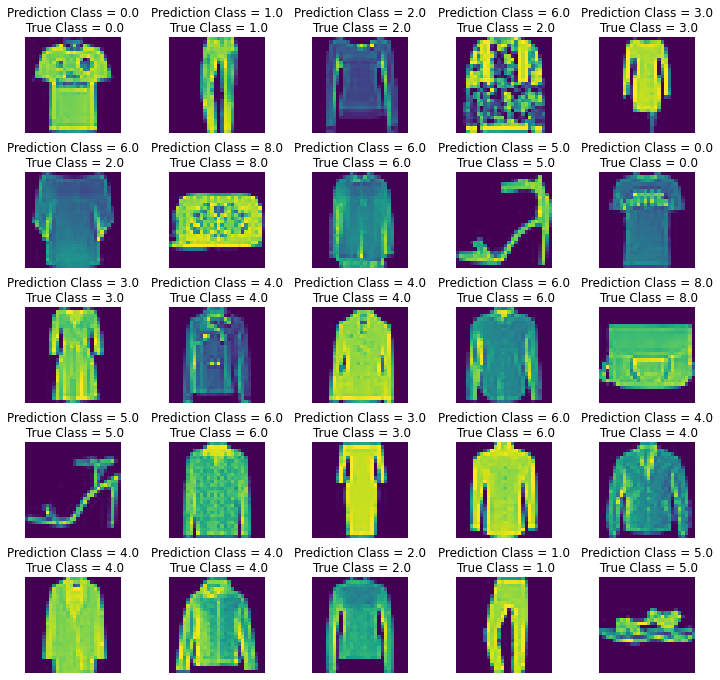

In [53]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


<AxesSubplot:>

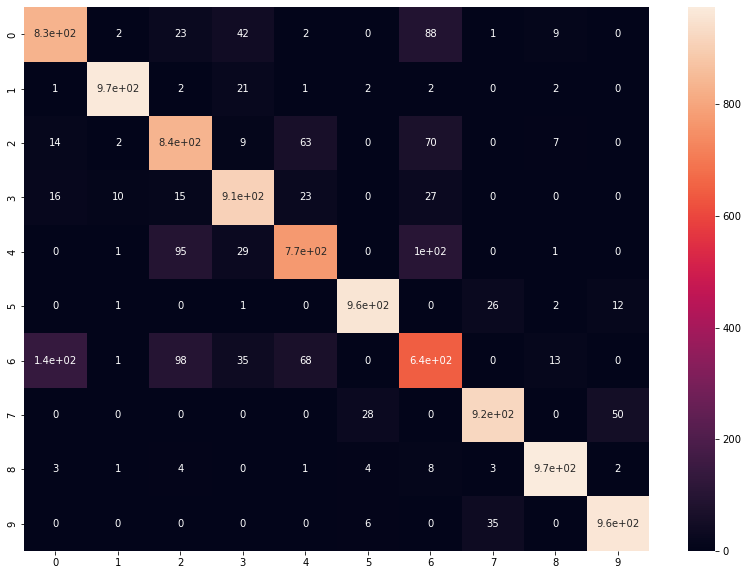

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [55]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.83      0.83      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.78      0.83      0.81      1000
     Class 3       0.87      0.91      0.89      1000
     Class 4       0.83      0.77      0.80      1000
     Class 5       0.96      0.96      0.96      1000
     Class 6       0.68      0.65      0.66      1000
     Class 7       0.93      0.92      0.93      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

